# 6 Naive Bayes 课后练习

姓名：华勤达

学号：2018212212229

贝叶斯网络对乳腺癌的诊断

     属性                                       代码    范围     
   -----------------------------------------------------------
    样本编号(Sample code number)                 SCN    id number
    团块厚度(Clump Thickness)                    CT     1 - 10
    细胞大小的均匀性(Uniformity of Cell Size)     UCSI   1 - 10
    细胞形状的均匀性(Uniformity of Cell Shape)    UCSH   1 - 10
    边缘附着力(Marginal Adhesion)                 MA     1 - 10
    单个上皮细胞大小(Single Epithelial Cell Size) SECS   1 - 10
    裸核(Bare Nuclei)                            BN     1 - 10
    温和的染色体(Bland Chromatin)                 BC     1 - 10
    正常核仁(Normal Nucleoli)                     NN     1 - 10
    线粒体(Mitoses)                               M      1 - 10
    类别(Class)                                   C      (2 for 良性, 4 for 恶性的)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

In [12]:
data = pd.read_csv('breast-cancer.csv')
data.drop(['SCN'], axis=1, inplace=True)
data.head()

,CT,UCSI,UCSH,MA,SECS,BN,BC,NN,M,C
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [13]:
#构建模型
model = BayesianModel([('UCSI', 'C'), ('UCSI', 'UCSH'), ('NN', 'C'), ('C', 'UCSH'), ('C', 'BC'), ('UCSI', 'BC'), ('UCSI', 'MA'), ('UCSI', 'SECS'), ('C', 'M'), ('C', 'BN'), ('C', 'CT')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

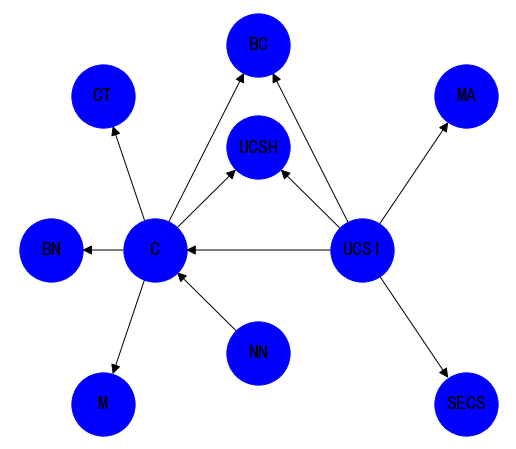

In [14]:
#绘制贝叶斯图
fid, ax = plt.subplots(figsize=(9,8))
positions = {'CT':(1,6), 'UCSI':(6,3), 'UCSH':(4,5), 'MA':(8,6), 'SECS':(8,0),'BN':(0,3), 'BC':(4,7), 'NN':(4,1), 'M':(1,0), 'C':(2,3)}

nx.draw(model, pos=positions, with_labels=True, node_size= 4000, font_size = 20, arrowsize=20, node_color='blue', ax=ax)

In [15]:
model.check_model()

True

In [16]:
model.get_cpds()

[<TabularCPD representing P(BC:10 | C:2, UCSI:10) at 0x7fb789469e20>,
 <TabularCPD representing P(BN:11 | C:2) at 0x7fb788fa8df0>,
 <TabularCPD representing P(C:2 | NN:10, UCSI:10) at 0x7fb78f7f6e20>,
 <TabularCPD representing P(CT:10 | C:2) at 0x7fb78f7f3070>,
 <TabularCPD representing P(M:9 | C:2) at 0x7fb78f7f3a30>,
 <TabularCPD representing P(MA:10 | UCSI:10) at 0x7fb78f7f6ca0>,
 <TabularCPD representing P(NN:10) at 0x7fb78f41f850>,
 <TabularCPD representing P(SECS:10 | UCSI:10) at 0x7fb78f7ef0d0>,
 <TabularCPD representing P(UCSH:10 | C:2, UCSI:10) at 0x7fb78fb71b20>,
 <TabularCPD representing P(UCSI:10) at 0x7fb78fb71eb0>]

#### 推理(Inference)

问题1： 如果细胞大小均匀性(Uniformity of Cell Size)为8且正常核仁(Normal Nucleoli)为1，则患者属于哪一类？

In [20]:
inference = VariableElimination(model)
#请补充问题1代码
query1 = inference.map_query(variables=['C'], evidence={ 'UCSI':8,'NN':1 })
print(query1)

Finding Elimination Order: : 100%|██████████| 7/7 [00:00<00:00, 283.68it/s]

Eliminating: UCSH: 100%|██████████| 7/7 [00:00<00:00, 215.74it/s]

{'C': 4}


问题2：假设类别(Class)为良性且细胞大小的均匀性(Uniformity of Cell Size)为1，则细胞形状均匀性(Uniformity of Cell Shape)的可能值是多少？

In [21]:
#请补充问题2代码
query2 = inference.map_query(variables=['UCSH'], evidence={'UCSI':1,'C':2    })
print(query2)

Eliminating: NN: 100%|██████████| 7/7 [00:00<00:00, 437.67it/s]

{'UCSH': 1}


问题3：在细胞大小均匀度值(Uniformity of Cell Size)为4的恶性类患者(malignant Class)中观察到哪种类型的Bland染色体(Bland Chromatin)？

In [22]:
#请补充问题3代码
query3 = inference.map_query(variables=['BC'], evidence={ 'UCSI':4 })
print(query3)

Eliminating: C: 100%|██████████| 8/8 [00:00<00:00, 431.29it/s]

{'BC': 4}


问题4：假设样本具有单元大小1的均匀性( Uniformity of Cell Size)，则可预测样本的单个上皮细胞大小(Single Epithelial Cell Size)。

In [23]:
#请补充问题4代码
query4 = inference.map_query(variables=['SECS'], evidence={'UCSI':1})
print(query4)

Eliminating: UCSH: 100%|██████████| 8/8 [00:00<00:00, 397.67it/s]

{'SECS': 2}


问题5：如果患者的类别是良性(Class benign)，有丝分裂(Mitosis)的最可能值是什么？

In [24]:
#请补充问题5代码
query5 = inference.map_query(variables=['M'], evidence={'C':2 })
print(query5)

Eliminating: UCSI: 100%|██████████| 8/8 [00:00<00:00, 233.17it/s]

{'M': 1}


In [25]:
infe = {'Query1': [[key for key in query1.keys()][0], [value for value in query1.values()][0]],
        'Query2': [[key for key in query2.keys()][0], [value for value in query2.values()][0]],
        'Query3': [[key for key in query3.keys()][0], [value for value in query3.values()][0]],
        'Query4': [[key for key in query4.keys()][0], [value for value in query4.values()][0]],
        'Query5': [[key for key in query5.keys()][0], [value for value in query5.values()][0]]}

result = pd.DataFrame(infe)
result.to_csv('output.csv', index=False)
result

,Query1,Query2,Query3,Query4,Query5
0,C,UCSH,BC,SECS,M
1,4,1,4,2,1


## 预测

In [26]:
print(data)

     CT  UCSI  UCSH  MA  SECS  BN  BC  NN  M  C
0     5     1     1   1     2   1   3   1  1  2
1     5     4     4   5     7  10   3   2  1  2
2     3     1     1   1     2   2   3   1  1  2
3     6     8     8   1     3   4   3   7  1  2
4     4     1     1   3     2   1   3   1  1  2
..   ..   ...   ...  ..   ...  ..  ..  .. .. ..
694   3     1     1   1     3   2   1   1  1  2
695   2     1     1   1     2   1   1   1  1  2
696   5    10    10   3     7   3   8  10  2  4
697   4     8     6   4     3   4  10   6  1  4
698   4     8     8   5     4   5  10   4  1  4

[699 rows x 10 columns]


In [27]:
train_data = data[:500].copy()
predict_data= data[500:].copy()

In [28]:
model = BayesianModel([('UCSI', 'C'), ('UCSI', 'UCSH'), ('NN', 'C'), ('C', 'UCSH'), ('C', 'BC'), ('UCSI', 'BC'), ('UCSI', 'MA'), ('UCSI', 'SECS'), ('C', 'M'), ('C', 'BN'), ('C', 'CT')])

In [29]:
#请完成预测代码
model.fit(data, estimator=BayesianEstimator)

对细胞大小的均匀性(UCSI)和类别(C)进行预测。

In [30]:
#请补充完善下面代码
predict_data.drop(['UCSI','C'], axis=1, inplace=True)

#请补充完善下面代码
y_pred = model.predict(predict_data)
y_pred

100%|██████████| 124/124 [00:05<00:00, 23.70it/s]


,C,UCSI
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1
...,...,...
194,2,1
195,2,1
196,4,10
197,4,8


In [31]:
y_pred = y_pred.to_numpy()
#请补充完善下面代码
y_data = data[['UCSI','C']][500:].to_numpy()

In [32]:
UCSI=0
C=0

for i in range(0,len(y_pred)):
    if y_pred[i][0] == y_data[i][0]:
        UCSI += 1
    if y_pred[i][1] == y_data[i][1]:
        C += 1

UCSI = (UCSI/len(y_data))*100
C = (C/len(y_data))*100

print("Accuracy of prediction : ")
print("细胞大小的均匀性: ", round(UCSI,2), "%")
print("类型: ", round(C,2), "%")

Accuracy of prediction : 
细胞大小的均匀性:  7.54 %
类型:  5.03 %
